# Modeling and Hyperparameter Tuning - Google Analytics Customer Prediction

## Table of Contents

    1. Introduction
    2. Importing 
    3. Splitting and Preparing data for modeling
    4. Modeling and Hyperparameter Tuning
        a. Logistic Regession
        b. Decision Tree Classifier
        c. Random Forest Classifier
        d. MultinomialNB
        e. XGBClassifier
    5. Model Selection
    6. Future Work

### 1. Introduction

In this notebook, the data, that has previously been cleaned and formated, will be split into training and testing dataframes. It will be fit to machine learning models to create predictions for our target variable for transaction complete. 

### 2. Importing

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('df_clean.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df.drop(['fullVisitorId', 'transactions', 'total_transactions', 'transactionRevenue', 
              'totalTransactionRevenue'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85417 entries, 0 to 85416
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channelGrouping                 85417 non-null  object 
 1   visitNumber                     85417 non-null  int64  
 2   browser                         85417 non-null  object 
 3   operatingSystem                 85417 non-null  object 
 4   isMobile                        85417 non-null  int64  
 5   deviceCategory                  85417 non-null  object 
 6   continent                       85417 non-null  object 
 7   subContinent                    85417 non-null  object 
 8   country                         85417 non-null  object 
 9   region                          85417 non-null  object 
 10  metro                           85417 non-null  object 
 11  city                            85417 non-null  object 
 12  networkDomain                   

### 3. Splitting and Preparing data for modeling

In [6]:
categorical_feat = ['channelGrouping', 'browser', 'operatingSystem', 'deviceCategory', 'continent', 'subContinent',
                    'country', 'region', 'metro', 'city', 'networkDomain', 'source', 'medium', 'keyword', 
                    'referralPath', 'adwordsClickInfo.slot', 'adwordsClickInfo.gclId', 'adContent', 'isTrueDirect',
                    'adwordsClickInfo.adNetworkType']

In [7]:
for feature in categorical_feat:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(list(df[feature].values.astype('str')))
    df[feature] = label_encoder.transform(list(df[feature].values.astype('str'))) 
    print("for feature {0}: label-encoding was done succesfully".format(feature))

for feature channelGrouping: label-encoding was done succesfully
for feature browser: label-encoding was done succesfully
for feature operatingSystem: label-encoding was done succesfully
for feature deviceCategory: label-encoding was done succesfully
for feature continent: label-encoding was done succesfully
for feature subContinent: label-encoding was done succesfully
for feature country: label-encoding was done succesfully
for feature region: label-encoding was done succesfully
for feature metro: label-encoding was done succesfully
for feature city: label-encoding was done succesfully
for feature networkDomain: label-encoding was done succesfully
for feature source: label-encoding was done succesfully
for feature medium: label-encoding was done succesfully
for feature keyword: label-encoding was done succesfully
for feature referralPath: label-encoding was done succesfully
for feature adwordsClickInfo.slot: label-encoding was done succesfully
for feature adwordsClickInfo.gclId: label

In [8]:
X = df.drop(columns='transaction_Complete', axis = 1)
y = df['transaction_Complete']

In [9]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=47)

### 4a. Logistic Regression

In [11]:
model = LogisticRegression()

parameters = {'class_weight': ['balanced', None],
              'penalty' : ['l1', 'l2', 'none'],
              'C': np.arange(0.5, 20.0, 0.5),
              'fit_intercept': [True, False],
             'multi_class': ['auto','ovr','multinomial']}

In [12]:
lg_random = RandomizedSearchCV(estimator = model, param_distributions = parameters,
                               verbose = False, n_iter = 10, cv = 5, random_state=42, n_jobs = -1)
lg_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", lg_random.best_estimator_)

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.93530296 0.93418651 0.9312515  0.93438949        nan        nan
 0.9352607  0.93158983 0.93438949        nan]
  warnings.warn(


 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=16.0, class_weight='balanced', fit_intercept=False)


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
y_pred = lg_random.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[23944  1410]
 [ 1707 23609]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     25354
           1       0.94      0.93      0.94     25316

    accuracy                           0.94     50670
   macro avg       0.94      0.94      0.94     50670
weighted avg       0.94      0.94      0.94     50670



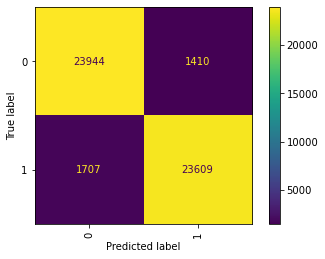

In [14]:
plot_confusion_matrix(lg_random, X_test, y_test,xticks_rotation='vertical')

In [15]:
lg_acc_score = accuracy_score(y_test, y_pred)
lg_pre_score = precision_score(y_test, y_pred)
lg_rec_score = recall_score(y_test, y_pred)
lg_f1_score = f1_score(y_test, y_pred)

### 4b. Decision Tree Classifier

In [16]:
model = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_leaf_nodes': [3,4,5,10,15,20,25,50,75,100,125,150,200, None]}

In [17]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=50, max_features='sqrt', max_leaf_nodes=100,
                       min_samples_leaf=25, min_samples_split=100)


In [18]:
y_pred = dt_random.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[24193  1161]
 [   76 25240]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     25354
           1       0.96      1.00      0.98     25316

    accuracy                           0.98     50670
   macro avg       0.98      0.98      0.98     50670
weighted avg       0.98      0.98      0.98     50670



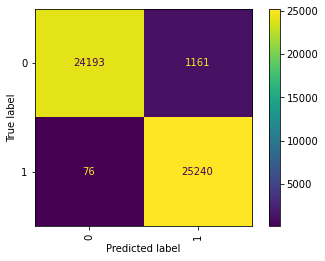

In [19]:
plot_confusion_matrix(dt_random, X_test, y_test,xticks_rotation='vertical')

In [20]:
dt_acc_score = accuracy_score(y_test, y_pred)
dt_pre_score = precision_score(y_test, y_pred)
dt_rec_score = recall_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred)

### 4c. Random Forest Classifier

In [21]:
model = RandomForestClassifier()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
              'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'min_weight_fraction_leaf': [0.01, 0.1, 0.25, 0.001, 0.5, 0.75, 0.9],
               'bootstrap': [True, False]}

In [22]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose = False, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.95937512        nan        nan 0.96005178        nan
 0.52004568        nan        nan 0.95026558]
  warnings.warn(


 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, max_depth=25, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=400,
                       min_weight_fraction_leaf=0.01, n_estimators=40)


In [23]:
y_pred = rf_random.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[23837  1517]
 [  362 24954]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     25354
           1       0.94      0.99      0.96     25316

    accuracy                           0.96     50670
   macro avg       0.96      0.96      0.96     50670
weighted avg       0.96      0.96      0.96     50670



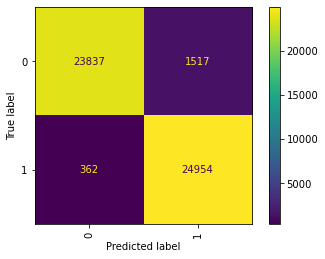

In [24]:
plot_confusion_matrix(rf_random, X_test, y_test,xticks_rotation='vertical')

In [25]:
rf_acc_score = accuracy_score(y_test, y_pred)
rf_pre_score = precision_score(y_test, y_pred)
rf_rec_score = recall_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)

### 4d. MultinomialNB

In [26]:
model = MultinomialNB()

parameters = {"alpha":[0.001,0.005,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                "fit_prior":[True,False]}

In [27]:
mnb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose = False, random_state=42, n_jobs = -1)
mnb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mnb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MultinomialNB(alpha=0.3)


In [28]:
y_pred = mnb_random.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[20025  5329]
 [ 4169 21147]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     25354
           1       0.80      0.84      0.82     25316

    accuracy                           0.81     50670
   macro avg       0.81      0.81      0.81     50670
weighted avg       0.81      0.81      0.81     50670



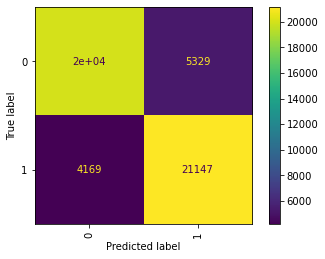

In [29]:
plot_confusion_matrix(mnb_random, X_test, y_test,xticks_rotation='vertical')

In [30]:
mnb_acc_score = accuracy_score(y_test, y_pred)
mnb_pre_score = precision_score(y_test, y_pred)
mnb_rec_score = recall_score(y_test, y_pred)
mnb_f1_score = f1_score(y_test, y_pred)

### 4e. XGBClassifier

In [31]:
model = XGBClassifier()

parameters = {'n_estimators':[5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
          'min_child_weight': [1, 5, 10],
          'gamma': [0.1, 0.25, 0.5, 1, 1.5, 2, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'class_weight':[None,'balanced'],
          'max_depth': [1,2,3,4,5,10,15,20,25,50,75,100,125,150,200],
          'learning_rate':[0.001,0.01,0.05,0.1,0.2,0.3]
         }

In [32]:
xgb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose = False, random_state=42, n_jobs = -1)
xgb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", xgb_random.best_estimator_)

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:10:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Results from Random Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [33]:
y_pred = xgb_random.predict(X_test)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[25068   286]
 [    0 25316]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     25354
           1       0.99      1.00      0.99     25316

    accuracy                           0.99     50670
   macro avg       0.99      0.99      0.99     50670
weighted avg       0.99      0.99      0.99     50670



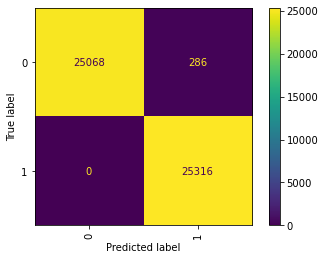

In [34]:
plot_confusion_matrix(xgb_random, X_test, y_test,xticks_rotation='vertical')

In [35]:
xgb_acc_score = accuracy_score(y_test, y_pred)
xgb_pre_score = precision_score(y_test, y_pred)
xgb_rec_score = recall_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred)

### 5. Model Selection

In [40]:
# Creating a models table
model_selection=pd.DataFrame({'Model':['Logistic Regession', 'Decision Tree Classifier', 'Random Forest Classifier',
                                        'MultinomialNB', 'XGBClassifier'], 
                             'Accuracy Score':[lg_acc_score, dt_acc_score, rf_acc_score, mnb_acc_score, xgb_acc_score],
                             'Precision Score':[lg_pre_score, dt_pre_score, rf_pre_score, mnb_pre_score,xgb_pre_score],
                             'Recall Score':[lg_rec_score, dt_rec_score, rf_rec_score, mnb_rec_score, xgb_rec_score],
                             'F1 Score':[lg_f1_score, dt_f1_score, rf_f1_score, mnb_f1_score, xgb_f1_score]})

In [41]:
model_selection

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regession,0.938484,0.943643,0.932572,0.938075
1,Decision Tree Classifier,0.975587,0.956024,0.996998,0.976081
2,Random Forest Classifier,0.962917,0.942692,0.985701,0.963717
3,MultinomialNB,0.812552,0.798723,0.835322,0.816613
4,XGBClassifier,0.994356,0.988829,1.000000,0.994383


The XGBClassifier with hyperparameter tuning is a clear selection for the best model. It outscored the other models in all four of the scores. 

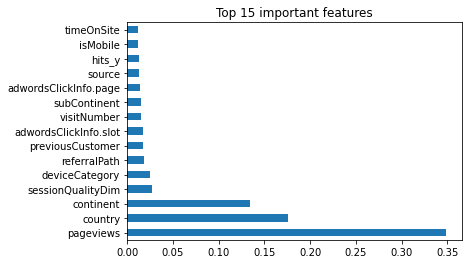

In [55]:
feat_importances = pd.Series(xgb_random.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

### 6. Future Work

With further research, I would investigate to results of feature engineering new columns. 
This could potentially create some new features of importance and help make more accurate models. 